# Introduction

The degree of depressive symptology in an individual can be measured on the Center for Epidemiological Studies Depression Scale ale (CES-D; Radloff, 1977). Our interest here is in examining to what extent the items of the The Toronto Alexithymia Scale (TAS-20; Bagby, Parker, & Taylor, 1994), which measures the inability to recognise and verbalise emotions, can help predict the CES-D score. Our sample consists of 122 psychology university students characterised by their age and sex.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('data_alexithymia2.csv', sep=';', index_col='ID')
data.head()

,Sex,Age,X.confused,X.right.words,X.sensations,X.describe,X.analyze.problems,X.upset,X.puzzled,X.let.happen,...,X.describe.more,X.going.on,X.why.angry,X.daily.activities,X.entertainment,X.reveal.feelings,X.close,X.useful,X.hidden.meanings,CESD
ID,,,,,,,,,,,,,,,,,,,,,
1,F,19,0,0,0,3,1,0,0,2,...,0,0,0,2,3,0,4,2,2,0
2,M,19,3,3,0,3,4,2,1,1,...,0,1,1,1,1,1,2,3,1,23
3,M,18,3,1,0,3,3,0,0,0,...,0,0,3,1,0,0,3,2,0,46
4,M,18,2,0,0,4,4,0,2,0,...,0,0,0,4,0,4,4,4,4,11
5,M,18,1,2,0,4,4,1,0,1,...,2,0,0,0,0,1,4,3,4,8


In [6]:
data['Sex'] = data['Sex'].map({'F': 1, 'M': 0})
data['Sex'].head()

ID
1    1
2    0
3    0
4    0
5    0
Name: Sex, dtype: int64

In [ ]:
data.var()

Sex                      0.251998
Age                      2.929684
X.confused               1.388701
X.right.words            1.635348
X.sensations             1.151402
X.describe               1.479542
X.analyze.problems       1.161089
X.upset                  1.678634
X.puzzled                1.294472
X.let.happen             1.302534
X.identify               1.620919
X.essential              1.231066
X.feel.about.people      1.475410
X.describe.more          1.363569
X.going.on               1.470803
X.why.angry              1.496884
X.daily.activities       1.514226
X.entertainment          1.601477
X.reveal.feelings        2.097886
X.close                  1.240008
X.useful                 1.193131
X.hidden.meanings        1.045116
CESD                   118.350156
dtype: float64

# Methods

We used principal component analysis in order to single out the items of the TAS-20 scale that explain the majority of the variance in our data.

Our data set consists of the 20 items of the TAS-20 scale, the age and sex of the students, and their CESD score. First, the data was scaled: if we do not scale the variables before PCA, then the principal components would mostly be driven by the ```CESD``` variable since it has by far the largest variance. Then, PCA was carried out on the data, and the explained variance ratios were examined.

# Results

In [9]:
scaler = StandardScaler(with_std=True, with_mean=True)
data_scaled = scaler.fit_transform(data)

In [10]:
pca = PCA()
pca.fit(data_scaled)
pca.mean_

array([ 5.09610569e-17,  6.30643079e-16,  1.72903586e-17, -4.73209814e-17,
       -6.37013211e-17,  9.64620005e-17,  1.04197161e-16, -2.36604907e-17,
       -6.00612456e-17, -5.00510380e-18, -1.91103963e-17, -2.00204152e-17,
        6.00612456e-17,  6.36871020e-17, -5.46011324e-17, -2.18404529e-17,
        6.55213588e-17,  0.00000000e+00, -1.41052925e-17, -1.92924001e-16,
        1.22852548e-17,  4.55009436e-17, -3.45807172e-17])

After fitting PCA, the means of all the variables are zero.

In [11]:
scores = pca.transform(data_scaled)

In [46]:
pd.DataFrame(scores[:, :11]).to_csv('../Lecture-10/scores.csv')

In [13]:
pca.components_.shape

(23, 23)

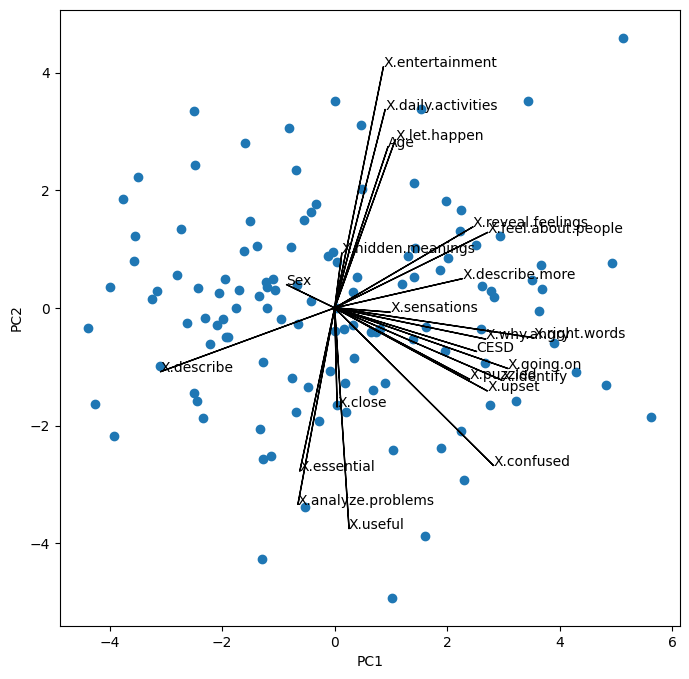

In [44]:
scale_arrow = s_ = 10
scores[:, 1] *= -1
pca.components_[1] *= -1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i, k], s_*pca.components_[j, k])
    ax.text(s_*pca.components_[i, k], s_*pca.components_[j, k], data.columns[k])

<b>Figure 1: Second principal component (PC) against first PC.

```X.right.words``` has the largest loading on the first principal component.
```X.entertainment``` has the largest loading on the second principal component.

In [18]:
pca.explained_variance_ratio_

array([0.22021843, 0.11687319, 0.0762988 , 0.0687719 , 0.05824222,
       0.04916788, 0.04834544, 0.04353519, 0.04164885, 0.03639045,
       0.03181484, 0.02993967, 0.02784539, 0.02286774, 0.02118357,
       0.01940149, 0.01783708, 0.01607688, 0.01536281, 0.01342336,
       0.01118282, 0.00877889, 0.00479311])

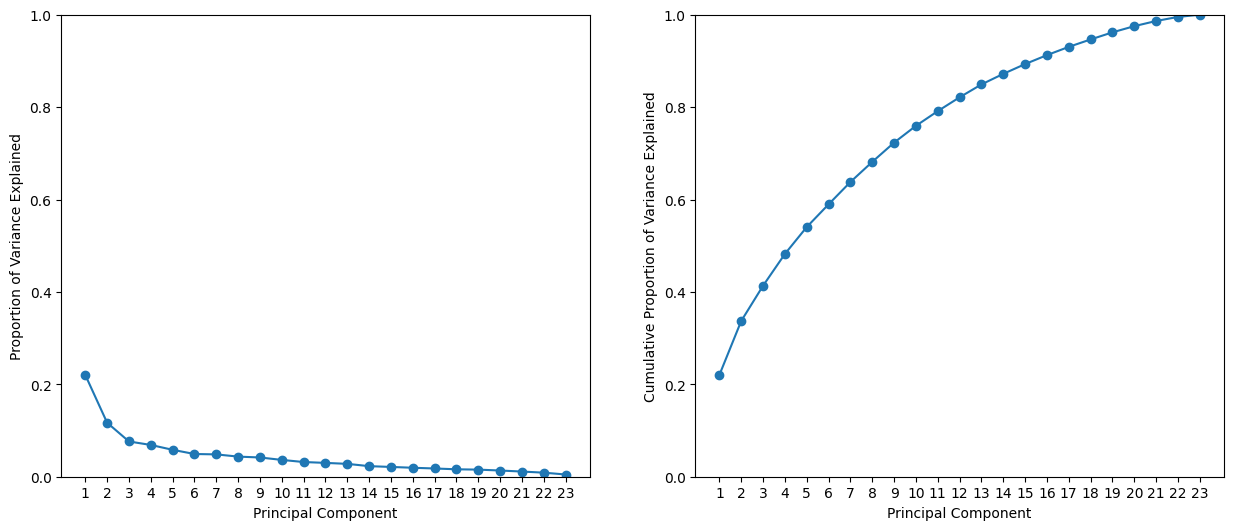

In [42]:
pve_ratios = pca.explained_variance_ratio_

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_) + 1
ax = axes[0]
ax.plot(ticks, pve_ratios, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks);

ax = axes[1]
ax.plot(ticks, pve_ratios.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks);


<b>Figure 2: Scree plot of the PVE ratios.

```Sex``` comes out as the variable with the highest proportion of variance explained (PVE) ratio - just over 22% - followed by ```Age``` - approx. 12% - and ```X.confused``` - approx 8%. 

# Discussion

We would like to keep the smallest number of principal components required to get a good understanding of our data. Because none of our variables truly stand out in terms of PVE ratios, there is no clear "elbow" pattern in Figure 2. Therefore, we chose to select the first 11 components, as the cumulative PVE reaches 80% at the 11th component - the choice of 80% is of course arbitrary. We deem the subsequent increases in cumulative PVE too small to justify selecting more components.

# Appendix

In [ ]:
df = pd.DataFrame({'Variance explained (%)':pve_ratios}, index=data.columns)
df

,Variance explained (%)
Sex,0.220218
Age,0.116873
X.confused,0.076299
X.right.words,0.068772
X.sensations,0.058242
X.describe,0.049168
X.analyze.problems,0.048345
X.upset,0.043535
X.puzzled,0.041649
X.let.happen,0.036390


<b>Table 1: Proportion of variance explained (%) ratios.</b>